In [1]:
# importing the necessary libraries --> numpy for multidimensional array manipulation and pandas for data analysis
import numpy as np
import pandas as pd

In [2]:
pip install scikit-learn==1.4.0

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [3]:
# importing the dataset
df = pd.read_excel('dataset.xlsx')

In [4]:
# Viewing any 5 random samples with their associated lables from dataset
df.sample(5)

,text,label
4073,"Mr. stalled in Indonesia, hehe, there are only...",0.0
2325,Every year the month of Ramadan does he like t...,0.0
1825,It's so lazy,0.0
6133,8/7 more days to bye bye banner zhongli :],0.0
5086,Arek arek iki yo sek yamene wes info chip info...,0.0


In [5]:
# Viewing the shape of dataset (rows,columns)
df.shape

(6982, 2)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6972 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [8]:
# Checking is there is any null values in the dataset
df.isnull().sum()

text     10
label     2
dtype: int64

In [9]:
# dropping the null(NaN) values from dataset
df=df.dropna(how='any')

In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
# Checking if there is any duplicated values in the dataset
df.duplicated().sum()

77

In [12]:
# dropping the duplicate values by keeping their first instance
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
# viewing the dataset shape after removing null and duplicate values
df.shape

(6893, 2)

# 2. EDA(Exploratory Data Analysis)

In [15]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [16]:
# Viewing the label counts as "0" for not-depressed and "1" for depressed 
df['label'].value_counts()

label
0.0    6181
1.0     712
Name: count, dtype: int64

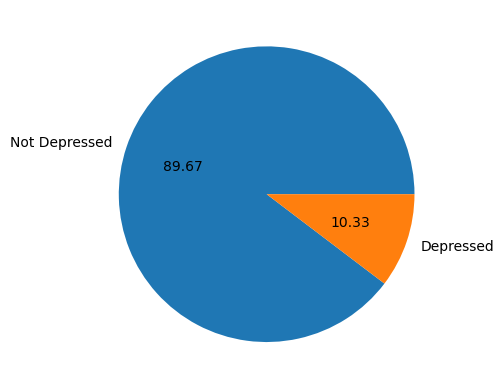

In [17]:
# import matplotlib library for data visualization
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['Not Depressed', 'Depressed'], autopct = "%0.2f")
plt.show()

In [18]:
# Data is imbalanced

In [19]:
# The Natural Language Toolkit(NLTK) is a platform used for building Python programs that work with human language data for 
# applying in statistical natural language processing(NLP).. 
# It contains text processing libraries for tokenization, parsing, classification, stemming, tagging and semantic reasoning.

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Counting the number of characters in each sentence(text) and add it to our original dataset.
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,text,label,num_characters
0,oh my gosh,1.0,10
1,"trouble sleeping, confused mind, restless hear...",1.0,64
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78
3,I've shifted my focus to something else but I'...,1.0,61
4,"I'm restless and restless, it's been a month n...",1.0,72


In [24]:
# Counting the number of words in each sentence(text) and add it to our original dataset. first with the help of nltk library 
# split each words in tokens and store into a list and then count the number of words.
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,text,label,num_characters,num_words
0,oh my gosh,1.0,10,3
1,"trouble sleeping, confused mind, restless hear...",1.0,64,13
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78,17
3,I've shifted my focus to something else but I'...,1.0,61,13
4,"I'm restless and restless, it's been a month n...",1.0,72,20


In [26]:
# Counting the number of sentences in each text message and add it to our original dataset. first with the help of nltk library 
# split each words in tokens and store into a list and then count the number of sentence.
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [27]:
df.head()

,text,label,num_characters,num_words,num_sentences
0,oh my gosh,1.0,10,3,1
1,"trouble sleeping, confused mind, restless hear...",1.0,64,13,2
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78,17,2
3,I've shifted my focus to something else but I'...,1.0,61,13,1
4,"I'm restless and restless, it's been a month n...",1.0,72,20,2


In [28]:
# Viewing the statistical description of num_char, num_words and num_sentences
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6893.000000,6893.000000,6893.000000
mean,68.900914,15.412883,1.407950
std,59.197312,13.283959,0.880798
min,3.000000,1.000000,1.000000
25%,27.000000,6.000000,1.000000
50%,51.000000,12.000000,1.000000
75%,91.000000,20.000000,2.000000
max,371.000000,92.000000,25.000000


In [29]:
# Not Depressed
df[df['label'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6181.000000,6181.000000,6181.000000
mean,66.863776,14.929785,1.395082
std,58.028477,12.972011,0.868843
min,3.000000,1.000000,1.000000
25%,26.000000,6.000000,1.000000
50%,50.000000,11.000000,1.000000
75%,88.000000,20.000000,2.000000
max,371.000000,92.000000,25.000000


In [30]:
#Depressed
df[df['label'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,712.000000,712.000000,712.000000
mean,86.585674,19.606742,1.519663
std,65.961639,15.108324,0.971988
min,7.000000,1.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,69.500000,16.000000,1.000000
75%,115.000000,26.000000,2.000000
max,327.000000,84.000000,8.000000


In [31]:
# importing seaborn library for data visualization
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

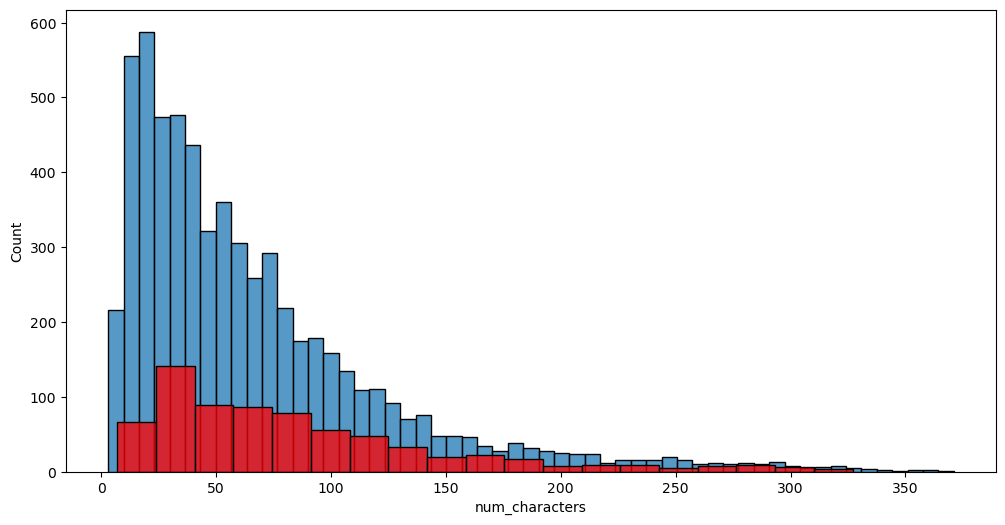

In [32]:
# with the help of histogram plot we're trying to check the relationship for both labels "0" and "1" with number of characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

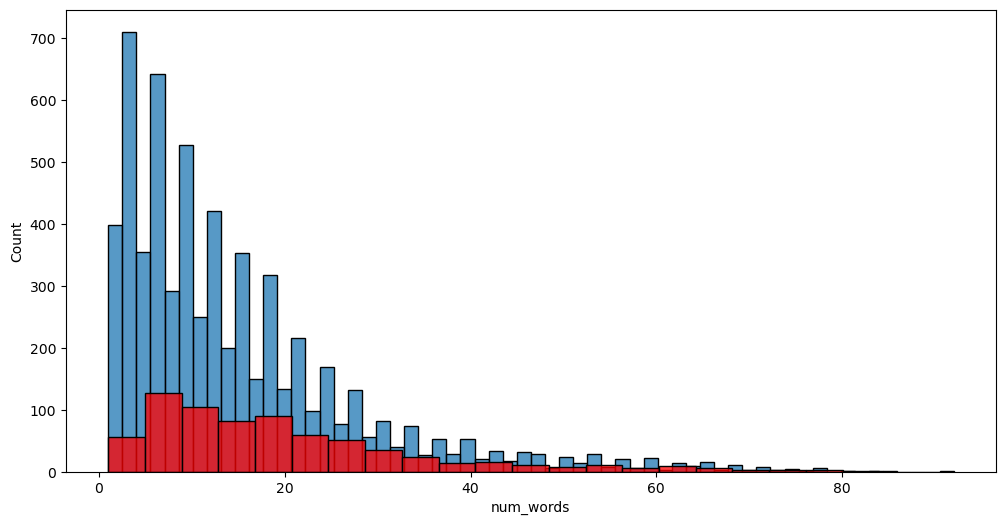

In [33]:
# with the help of histogram plot we're trying to check the relationship for both labels "0" and "1" w.r.to number of words
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color = 'red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


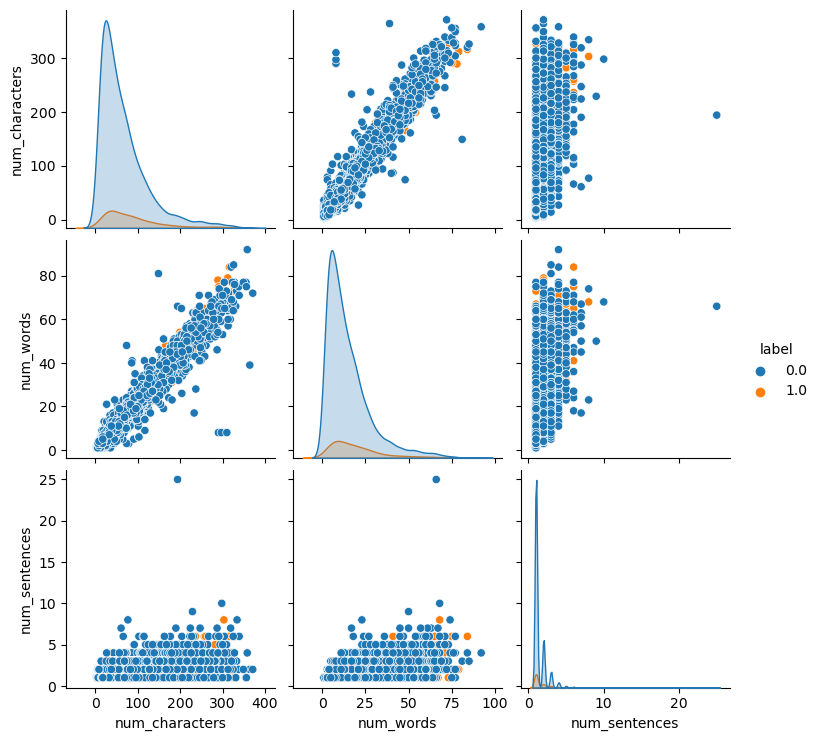

In [34]:
sns.pairplot(df,hue='label')

<Axes: >

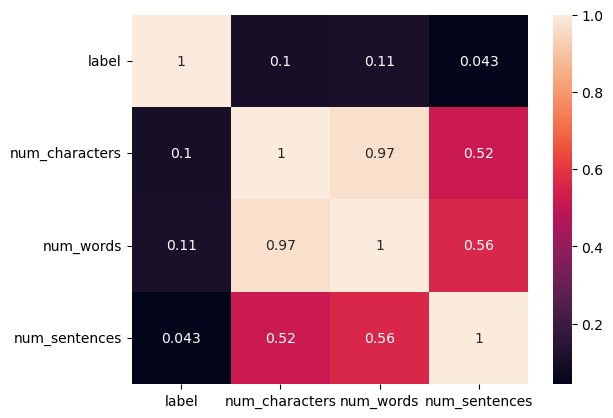

In [35]:
#heatmap is a graphical representation of data where values in a matrix are represented as colors. It's a useful tool for 
#visualizing the intensity of data at different points, making it easier to identify patterns or trends.
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)

# 3. Data Preprocessing


### Lower case
### Tokenization
### Removing Special Characters
### Removing stop words and punctuation
### Stemming

In [36]:
def transform_text(text):
    ## Convert the text to lowercase to ensure consistency in word representations
    text = text.lower()
    ## Tokenize the text into a list of words
    text = nltk.word_tokenize(text)
    ## Filter out non-alphanumeric characters and create a new list 'y'
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    ## Update 'text' to contain only alphanumeric words     
    text = y[:]
    y.clear()
    ## Remove stopwords and punctuation using NLTK's stopwords and string.punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    ## Update 'text' to contain only non-stopwords and non-punctuation words   
    text = y[:]
    y.clear()
    ## Apply stemming using NLTK's PorterStemmer to reduce words to their root form
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [40]:
transform_text("trouble sleeping, confused mind, restless heart. All out of tune")

'troubl sleep confus mind restless heart tune'

In [41]:
df['text'][1]

'trouble sleeping, confused mind, restless heart. All out of tune'

In [42]:
# Apply the 'transform_text' function to each text in the 'text' column of the DataFrame using the 'apply' method
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,text,label,num_characters,num_words,num_sentences,transformed_text
0,oh my gosh,1.0,10,3,1,oh gosh
1,"trouble sleeping, confused mind, restless hear...",1.0,64,13,2,troubl sleep confus mind restless heart tune
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78,17,2,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,1.0,61,13,1,shift focu someth els still worri
4,"I'm restless and restless, it's been a month n...",1.0,72,20,2,restless restless month boy mean


In [44]:
# Import the WordCloud class from the wordcloud library
from wordcloud import WordCloud
wc = WordCloud(max_words=500, height= 800, width = 1500,  background_color="black", colormap= 'viridis')

In [45]:
 depressed_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

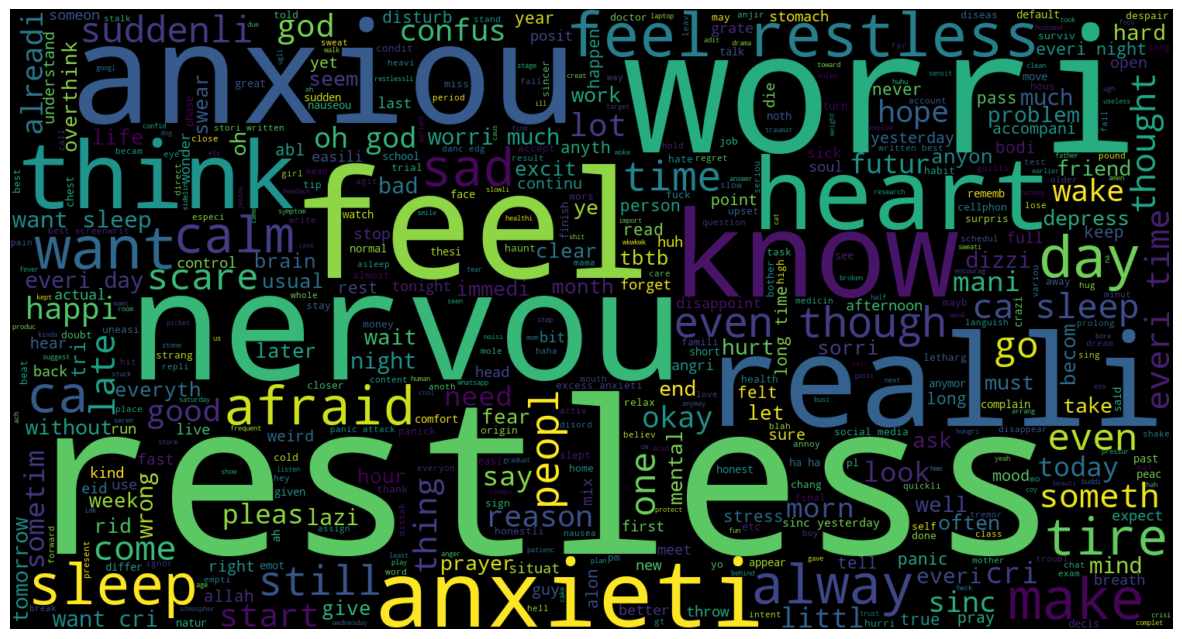

In [46]:
plt.figure(figsize=(15,10))
plt.imshow(depressed_wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [47]:
not_depressed_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

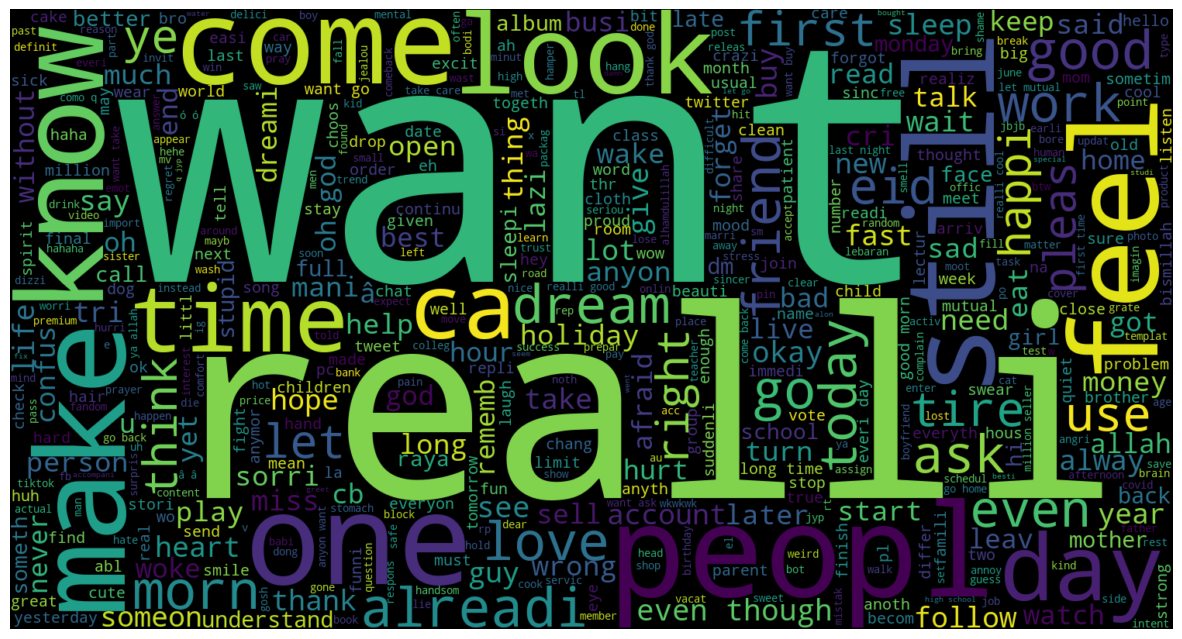

In [48]:
plt.figure(figsize=(15,10))
plt.imshow(not_depressed_wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
#try to check top 30 words that proves depressed
depressed_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        depressed_corpus.append(word)

In [50]:
len(depressed_corpus)

5557

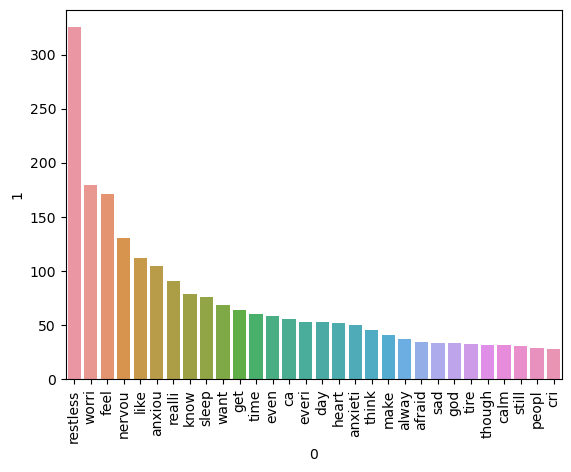

In [51]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(depressed_corpus).most_common(30))[0], y=pd.DataFrame(Counter(depressed_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
#try to check top 30 words that proves non-depressed
not_depressed_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        not_depressed_corpus.append(word)

In [53]:
len(not_depressed_corpus)

40852

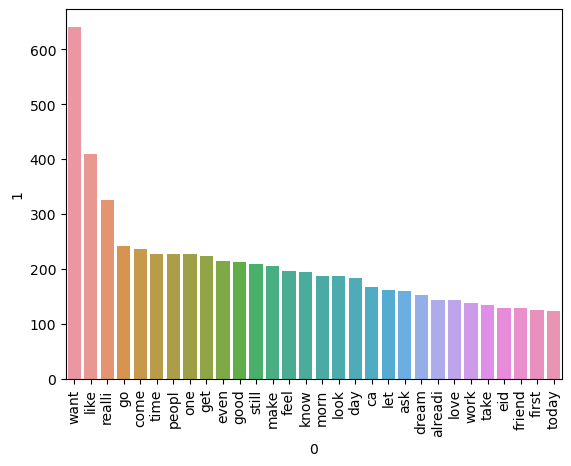

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(not_depressed_corpus).most_common(30))[0], y=pd.DataFrame(Counter(not_depressed_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [55]:
#text vectorization
# Bag of Words
df.head()

,text,label,num_characters,num_words,num_sentences,transformed_text
0,oh my gosh,1.0,10,3,1,oh gosh
1,"trouble sleeping, confused mind, restless hear...",1.0,64,13,2,troubl sleep confus mind restless heart tune
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,78,17,2,wrong back dear forward doubt stay restless re...
3,I've shifted my focus to something else but I'...,1.0,61,13,1,shift focu someth els still worri
4,"I'm restless and restless, it's been a month n...",1.0,72,20,2,restless restless month boy mean


In [56]:
#TF-IDF(Term Frequency - Inverse Document frequency)
# Term Frequency = No.of reptition of words in sentence / No. of words in sentence
# IDF = log(No. of sentences / No. of sentences containing words)
## Finally to calculate final output = TF * IDF

#Example:
#Sentence 1 : good boy
#Sentence 2 : good girl
#Sentence 3 : boy girl good

# Words     Frequency
#  good       3
#   boy      2
#   girl     2

## TF:

#        Sent 1    Sent 2     Sent3
# good    [1/2]    [1/2]      [1/3]
# boy     [1/2]    [0]        [1/3]
# girl    [0]      [1/2]      [1/3]

## IDF:

# Words     IDF
# good     log(3/3)=0
#boy       log(3/2)
#girl      log(3/2)

#then,
# TF * IDF = 

#            f1            f2                            f3                         O/P
#           good           boy                         girl                      

#Sent1      [1/2*0]=0    [1/2*log(3/2)]=0.088         [0*log(3/2)]=0               0.088   importance is given to boy
#Sent2      0            0                           [1/2*log(3/2)]=0.088          0.088   importance is given to girl
#Sent3      0            [1/3*log(3/2)]=0.058        [1/3*log(3/2)]=0.058          0.0116  boy & girl both

# After converting my sentences into these vectors, now i will take this o/p means dependent feature , give it to my model for
# training and this output will be treated as a dependent feature.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [58]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [59]:
X.shape

(6893, 8942)

In [60]:
y = df['label'].values

In [61]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7142857142857143
[[891 347]
 [ 47  94]]
0.21315192743764172


In [67]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9173313995649021
[[1237    1]
 [ 113   28]]
0.9655172413793104


In [68]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8984771573604061
[[1218   20]
 [ 120   21]]
0.5121951219512195


In [69]:
# We used Tfidf --> MNB

In [70]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Logistic Regression is linear model used for binary classification that estimates the probability of an instance belonging to
#a particular class.
#SVM is a powerful classification algorithm that finds the optimal hyperplane to separate different classes in a high-dimensional
#space.
#MNB is a probabilistic model based on Bayes' theorem suitable for text classification tasks, often used for multiple classes.
# DT is a tree-like model that makes decisions based on feature values, dividing the dataset into subsets to reach a final
#prediction.
#KNN is A simple algorithm that classifies instances based on the majority class among their k-nearest neighbors in the feature
#space.
#RF is An ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and reduce
#overfitting.
#Adaboost is An ensemble method that combines weak learners sequentially, assigning more weight to misclassified instances to improve 
#overall performance.
#Bagging An ensemble method that builds multiple models in parallel, averaging their predictions to improve stability and reduce
#variance.
# Extra Trees Similar to the Random Forest, it builds multiple decision trees but uses random splits and selects the
#best-performing ones.
#Gradient Boosting is An ensemble method that builds trees sequentially, each correcting the errors of the previous one, resulting
#in a powerful model.
#XGBoost is An efficient and scalable implementation of gradient boosting that often performs well in various machine learning
#tasks.

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [74]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9862218999274837, 0.9552238805970149)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9862218999274837
Precision -  0.9552238805970149
For  KN
Accuracy -  0.9202320522117476
Precision -  0.8974358974358975
For  NB
Accuracy -  0.9173313995649021
Precision -  0.9655172413793104
For  DT
Accuracy -  0.9869470630891951
Precision -  0.948905109489051
For  LR
Accuracy -  0.9854967367657723
Precision -  0.9548872180451128
For  RF
Accuracy -  0.9833212472806382
Precision -  0.9682539682539683


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9883973894126178
Precision -  0.9496402877697842
For  BgC
Accuracy -  0.9876722262509064
Precision -  0.9428571428571428
For  ETC
Accuracy -  0.9695431472081218
Precision -  0.9024390243902439
For  GBDT
Accuracy -  0.9883973894126178
Precision -  0.9496402877697842
For  xgb
Accuracy -  0.9869470630891951
Precision -  0.9424460431654677


In [77]:
## Create a DataFrame named 'performance_df' to store algorithm performance metrics
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.983321,0.968254
2,NB,0.917331,0.965517
0,SVC,0.986222,0.955224
4,LR,0.985497,0.954887
6,AdaBoost,0.988397,0.949640
9,GBDT,0.988397,0.949640
3,DT,0.986947,0.948905
7,BgC,0.987672,0.942857
10,xgb,0.986947,0.942446
8,ETC,0.969543,0.902439


In [78]:
## Use the 'pd.melt' function to reshape the DataFrame 'performance_df'
## The original DataFrame to be reshaped
# The column that should remain unchanged (in this case, "Algorithm")
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [79]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.983321
1,NB,Accuracy,0.917331
2,SVC,Accuracy,0.986222
3,LR,Accuracy,0.985497
4,AdaBoost,Accuracy,0.988397
5,GBDT,Accuracy,0.988397
6,DT,Accuracy,0.986947
7,BgC,Accuracy,0.987672
8,xgb,Accuracy,0.986947
9,ETC,Accuracy,0.969543


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


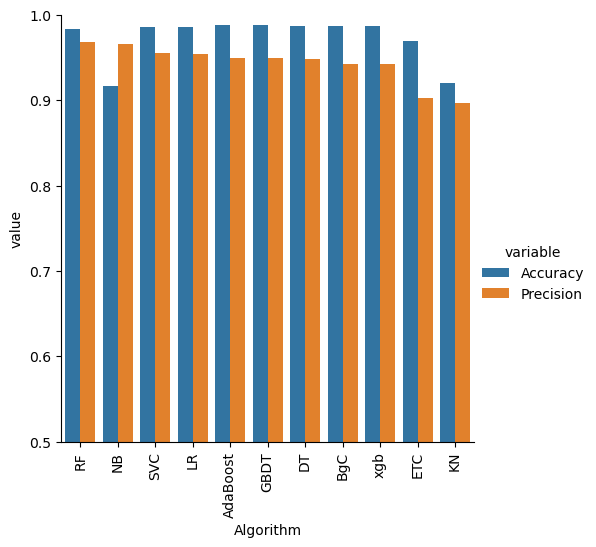

In [80]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [81]:
# model improve
# Change the max_features parameter of TfIdf

In [82]:
# Create a new DataFrame named 'temp_df' to store algorithm performance metrics for a specific case (e.g., max_ft_3000)
# Column for algorithm names extracted from the dictionary keys
## Column for accuracy scores corresponding to each algorithm
# Column for precision scores corresponding to each algorithm
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [83]:
## Create a new DataFrame named 'temp_df' to store algorithm performance metrics for a specific case (e.g., scaling)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [84]:
# Merge two DataFrames, 'performance_df' and 'temp_df', based on the common column 'Algorithm'
new_df = performance_df.merge(temp_df,on='Algorithm')

In [85]:
# Merge two DataFrames, 'new_df' and 'temp_df', based on the common column 'Algorithm'
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [87]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,RF,0.983321,0.968254,0.983321,0.968254,0.983321,0.968254,0.983321,0.968254
1,NB,0.917331,0.965517,0.917331,0.965517,0.917331,0.965517,0.917331,0.965517
2,SVC,0.986222,0.955224,0.986222,0.955224,0.986222,0.955224,0.986222,0.955224
3,LR,0.985497,0.954887,0.985497,0.954887,0.985497,0.954887,0.985497,0.954887
4,AdaBoost,0.988397,0.949640,0.988397,0.949640,0.988397,0.949640,0.988397,0.949640
5,GBDT,0.988397,0.949640,0.988397,0.949640,0.988397,0.949640,0.988397,0.949640
6,DT,0.986947,0.948905,0.986947,0.948905,0.986947,0.948905,0.986947,0.948905
7,BgC,0.987672,0.942857,0.987672,0.942857,0.987672,0.942857,0.987672,0.942857
8,xgb,0.986947,0.942446,0.986947,0.942446,0.986947,0.942446,0.986947,0.942446
9,ETC,0.969543,0.902439,0.969543,0.902439,0.969543,0.902439,0.969543,0.902439


In [88]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [90]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.981145757795504
Precision 0.9752066115702479


In [94]:
from sklearn.naive_bayes import MultinomialNB

# Assuming X_train and y_train are our training data
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)


In [95]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
#The pickle module is imported, which provides a way to serialize Python objects, making it easy to save and load them.

# 2nd line saves the TF-IDF vectorizer (tfidf) to a file named 'vectorizer.pkl'using binary write mode ('wb'). 
#The TF-IDF vectorizer is a preprocessed and fitted model that converts text data into numerical vectors.

#3rd line saves the Multinomial Naive Bayes model (mnb) to a file named 'model.pkl' using binary write mode ('wb').
#The Multinomial Naive Bayes model is a trained machine learning model used for text classification tasks, such as the one you
#may have in your project.